<a href="https://colab.research.google.com/github/mtxslv/DStask/blob/master/DeepLearningComputerVisionTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Brainstorming...*
Ok,ok... my task is: find out if a given image is rotated. If yes, fix it! Apparently, [there is an way of rotating easily](https://docs.fast.ai/vision.transform.html).

We need to understand how to [correct the image orientation](https://d4nst.github.io/2017/01/12/image-orientation/). But first, [how can we upload our dataset to Google Colab](https://medium.com/@yuraist/how-to-upload-your-own-dataset-into-google-colab-e228727c87e9)? Well... [let's do it directly from Dropbox](https://www.freecodecamp.org/news/how-to-transfer-large-files-to-google-colab-and-remote-jupyter-notebooks-26ca252892fa/)!

## *Uploading material..*
The very first thing needed is: uploading the datasets. Let's do it!

In [191]:
# needed to import data from dropbox
!git clone https://github.com/thatbrguy/Dropbox-Uploader.git
!cd Dropbox-Uploader

fatal: destination path 'Dropbox-Uploader' already exists and is not an empty directory.


In [0]:
# needed to import data from dropbox
!cd /Dropbox-Uploader/

/bin/bash: line 0: cd: /Dropbox-Uploader/: No such file or directory


In [0]:
#permissions
!chmod +x Dropbox-Uploader/dropbox_uploader.sh

In [0]:
# config
!bash Dropbox-Uploader/dropbox_uploader.sh


 This is the first time you run this script, please follow the instructions:

 1) Open the following URL in your Browser, and log in using your account: https://www.dropbox.com/developers/apps
 2) Click on "Create App", then select "Dropbox API app"
 3) Now go on with the configuration, choosing the app permissions and access restrictions to your DropBox folder
 4) Enter the "App Name" that you prefer (e.g. MyUploader64751564921251)

 Now, click on the "Create App" button.

 When your new App is successfully created, please click on the Generate button
 under the 'Generated access token' section, then execute the following command:

 echo "INPUT_YOUR_ACCESS_TOKEN_HERE" > token.txt



In [0]:
#config
!echo "X8baLKv_9BUAAAAAAAAAm9M0XfRUl5fhayoQ4prQGKu0djTxQ5uGj32DhkmmRwjJ" > token.txt

In [0]:
#downloading dataset to google colab
#actually, it is re-config
!bash Dropbox-Uploader/dropbox_uploader.sh download train.rotfaces.zip


 This is the first time you run this script, please follow the instructions:

 1) Open the following URL in your Browser, and log in using your account: https://www.dropbox.com/developers/apps
 2) Click on "Create App", then select "Dropbox API app"
 3) Now go on with the configuration, choosing the app permissions and access restrictions to your DropBox folder
 4) Enter the "App Name" that you prefer (e.g. MyUploader1044627916185)

 Now, click on the "Create App" button.

 When your new App is successfully created, please click on the Generate button
 under the 'Generated access token' section, then execute the following command:

 echo "INPUT_YOUR_ACCESS_TOKEN_HERE" > token.txt


 Found token.txt with access token: X8baLKv_9BUAAAAAAAAAm9M0XfRUl5fhayoQ4prQGKu0djTxQ5uGj32DhkmmRwjJ

 You can unlink this account if the token is wrong, using:
 ./dropbox-uploader.sh unlink

 The configuration has been saved.


In [0]:
#downloading never-seen-before data
!bash Dropbox-Uploader/dropbox_uploader.sh download test.rotfaces.zip

 > Downloading "/test.rotfaces.zip" to "/content/test.rotfaces.zip"... DONE


In [0]:
# actual data set downloading 
!bash Dropbox-Uploader/dropbox_uploader.sh download train.rotfaces.zip

 > Downloading "/train.rotfaces.zip" to "/content/train.rotfaces.zip"... DONE


## **And now?**
We downloaded the dataset from DropBox. Now we need [to unzip the datasets](https://stackoverflow.com/questions/49685924/extract-google-drive-zip-from-google-colab-notebook) and [to acess these files](https://medium.com/@Keshav31/colab-features-download-and-upload-e1ec537a83df) to run our network.

In [190]:
!unzip /content/train.rotfaces.zip

KeyboardInterrupt: ignored

In [0]:
!unzip /content/test.rotfaces.zip 

In [0]:
!find /content -name "*.csv"

/content/train.truth.csv
/content/labels.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv


## *Thinking about how we can make this happen...*

##plotting images using google colab may be very complicated. Let's use a trick...

In order to create image dataset, I will use [this](https://docs.fast.ai/vision.data.html#Quickly-get-your-data-ready-for-training). It is a reference from [this link](https://colab.research.google.com/github/SalChem/Fastai-iNotes-iTutorials/blob/master/Image_Recognizer_Tutorial.ipynb#scrollTo=onfrGDai8rZK). [Learn more](https://docs.fast.ai/vision.data.html#ImageDataBunch.from_csv)!

In [0]:
from fastai.vision import *
from fastai import core

In [0]:
!cp /content/train.truth.csv /content/labels.csv

In [0]:
#we need to put a file named "labels.csv" into train folder
!mv /content/labels.csv /content/train/labels.csv

In [0]:
# Creating (?) image dataset
tfms = get_transforms(do_flip=False)
img_data = ImageDataBunch.from_csv(path = '/content/train', ds_tfms=tfms,size=64,valid_pct= 0.2)

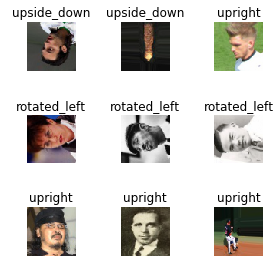

In [197]:
img_data.show_batch(rows=3, figsize=(4,4))

In [198]:
img_data

ImageDataBunch;

Train: LabelList (39117 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
rotated_left,rotated_left,upright,rotated_right,upside_down
Path: /content/train;

Valid: LabelList (9779 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
upright,upright,upside_down,rotated_right,upright
Path: /content/train;

Test: None

I have found a [Neural Network object](https://docs.fast.ai/tutorial.data.html) that runs with ImageDataBunch. I will use it.

In [0]:
learn = cnn_learner(img_data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1,1e-2)
learn.save('mini_train')

epoch,train_loss,valid_loss,accuracy,time
0,0.162759,0.088231,0.967890,14:28


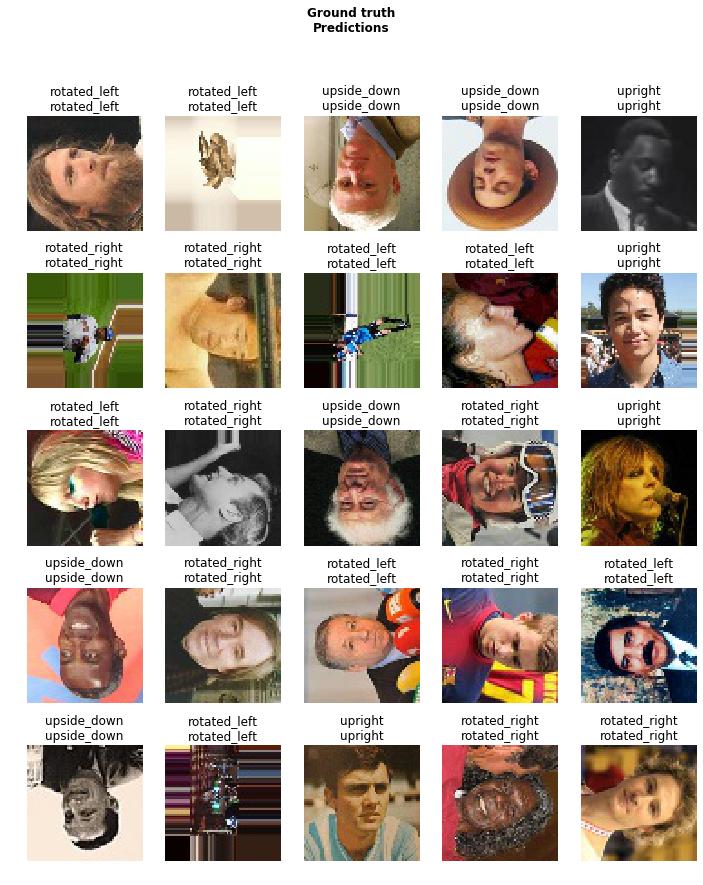

In [0]:
learn.show_results(rows=5, figsize=(12,14))

Our neural network is already trained! What we need to do is to classify the images in /content/test folder.

what about trying to predict just one picture? First, [open the image.](https://docs.fast.ai/vision.image.html#open_image).

In [0]:
unseen_example = vision.open_image('/content/test/90-10184590_1979-06-16_2006.jpg')

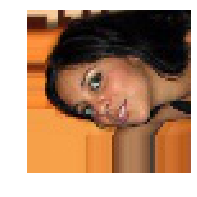

In [0]:
unseen_example.show()

In [0]:
learn.predict(unseen_example)

(Category rotated_left,
 tensor(0),
 tensor([9.9726e-01, 2.3719e-03, 2.0151e-04, 1.6181e-04]))

Trying a different approach.. we will try to [iterate over our folder /test/](https://www.mkyong.com/python/python-how-to-list-all-files-in-a-directory/).

In [259]:
import os

path = '/content/test/'

test_names = [] # it does have the names of each file in our dataset
# r=root, d=directories, f = test_names
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            test_names.append(file)

for f in test_names:
    print(f)

96-3676496_1901-10-28_1941.jpg
93-262793_1983-06-08_2011.jpg
92-3958892_1987-01-22_2013.jpg
94-8814094_1936-04-03_2004.jpg
92-549492_1973-08-27_2011.jpg
93-34188093_1985-06-27_2011.jpg
92-3907992_1985-05-16_2014.jpg
92-21194392_1988-07-19_2014.jpg
97-35526997_1988-02-21_2013.jpg
93-2604793_1984-02-26_2010.jpg
96-9626096_1985-11-28_2010.jpg
91-18701291_1987-12-09_2011.jpg
90-12618990_1943-05-22_2012.jpg
90-32490_1937-06-12_2008.jpg
99-10897699_1956-10-13_1950.jpg
94-17062594_1977-01-11_2010.jpg
90-2032290_1970-02-28_2013.jpg
95-36391395_1991-02-17_2012.jpg
97-3397097_1931-05-16_2009.jpg
92-3839992_1960-10-06_1989.jpg
90-39609890_1948-04-27_2013.jpg
90-38522390_1992-10-01_2012.jpg
98-2218998_1954-10-10_2013.jpg
97-12893097_1967-08-17_2011.jpg
95-28628095_1990-03-27_2012.jpg
91-7671891_1987-03-02_2006.jpg
94-2877794_1967-05-13_2010.jpg
91-4609691_1977-10-15_1970.jpg
95-36868395_1992-05-03_2012.jpg
97-25532897_1948-06-09_1978.jpg
97-41108497_1989-03-06_2012.jpg
94-321294_1949-05-12_2009.jp

In [253]:
type(test_names[2])

str

Notice that the classification follows this pattern...

* rotated left - tensor(0)
* rotated right - tensor(1)
* upright - tensor(2)
* upside down - tensor(3)

Let's use a method from torch to guarantee we are dealing with the right labels.

Now we must [generate an empty .csv file](https://www.tutorialspoint.com/How-to-save-a-Python-Dictionary-to-CSV-file).  Actually, our issue here is to [append a line at the end of file](https://stackoverflow.com/questions/2363731/append-new-row-to-old-csv-file-python).


In [0]:
import csv
my_dict = {'1': 'aaa', '2': 'bbb', '3': 'ccc'}
with open('test.csv', 'w') as f:
    for key in my_dict.keys():
        f.write("%s,%s\n"%(key,my_dict[key]))
        f.write(",\n")

In [0]:
import csv
import torch as tr

with open(r'prediction.csv','a') as f:
  writer = csv.writer(f)
  # making the right pattern
  writer.writerow(['fn','label'])
  for i in range(len(test_names)):
    #let's classificate the pictures in test/
    unlabelled_pic = vision.open_image('/content/test/'+test_names[i])
    prediction = learn.predict(unlabelled_pic)
    if(tr.equal(prediction[1],tr.tensor(0))):
       writer.writerow([test_names[i],'rotated_left'])             
    elif(tr.equal(prediction[1],tr.tensor(1))):
         writer.writerow([test_names[i],'rotated_right']) 
    elif(tr.equal(prediction[1],tr.tensor(2))):
         writer.writerow([test_names[i],'upright'])
    else:
         writer.writerow([test_names[i],'upside_down'])

In [0]:
import pandas as pd

class_pd= pd.read_csv('/content/prediction.csv')

In [305]:
class_pd['label'][0]

'upside_down'

In [307]:
class_pd['label'][0]=='upside_down'

True

In [306]:
type(class_pd['label'][0])

str

In [0]:
!rm /content/reoriented_pictures/rotated.jpg

##Rotating
Now we gonna try to rotate the images in /test/. [Here](https://pythontic.com/image-processing/pillow/rotate) we see an way of doing it. We still need to discover an way of [saving the pictures](https://pillow.readthedocs.io/en/3.1.x/reference/Image.html).

In [0]:
from PIL import Image

colorImage = Image.open('/content/test/'+test_names[0])
rotated = colorImage.rotate(0)
rotated.save('/content/reoriented_pictures/rotated.jpg')

In [0]:
for i in range(len(test_names)):
  NotRotatedImage = Image.open('/content/test/'+test_names[i])
  if(class_pd['label'][i]=='upside_down'):
    rotatedImage = NotRotatedImage.rotate(180)
  elif(class_pd['label'][i]=='rotated_right'):
    rotatedImage = NotRotatedImage.rotate(90)
  elif(class_pd['label'][i]=='rotated_left'):
    rotatedImage = NotRotatedImage.rotate(-90)
  else:
    rotatedImage = NotRotatedImage.rotate(0)
  rotatedImage.save('/content/reoriented_pictures/'+test_names[i])  

    

In [0]:
!rm /content/reoriented_pictures/*

In [302]:
# making a directory for corect-oriented images
!mkdir /content/reoriented_pictures/

mkdir: cannot create directory ‘/content/reoriented_pictures/’: File exists


In [0]:
a = learn.predict(one_more_example)

In [0]:
b = learn.predict(another_unseen_example)

In [0]:
c = tr.ones(1)

In [251]:
b

(Category upside_down,
 tensor(3),
 tensor([3.8670e-07, 1.9928e-06, 3.4257e-05, 9.9996e-01]))

In [270]:
tr.equal(a[1],tr.tensor(1))

True

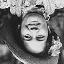

In [310]:
vision.open_image('/content/reoriented_pictures/rotated.jpg')

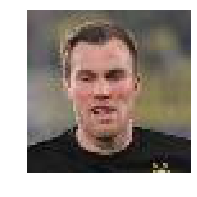

In [327]:
vision.open_image('/content/reoriented_pictures/'+test_names[7]).show()